#### This Projects is supposed to help anyone getting familiare with Transfer learning 
#### i think i did my best to explaine and to don't make errors 
#### but if you think i did an error you can correct me, my email : mouadmeziane28@gmail.com

## <span style="color:blue">Optimisation des Hyperparamètres par Fine-Tuning pour le Modèle Xception sur CIFAR-10</span>

# Objectif : 

Dans le cadre de ce travail pratique, l'objectif était de se familiariser avec les concepts avancés du Deep Learning, en mettant particulièrement l'accent sur l'optimisation des performances des modèles à travers le `Transfert Learning`. Grâce à l'utilisation de modèles pré-entraînés tels que <b>Xception</b>, <b>ResNet</b>, <b>DenseNet</b> ... , nous avons exploré les capacités du transfert learning dans des tâches de classification d'images. Ce Projet nous a offert une expérience pratique précieuse pour appliquer ces concepts en construisant nos propres modèles Deep Learning et en les optimisant pour des performances maximales. En utilisant des techniques de recherche d'hyperparamètres telles que la recherche aléatoire, nous avons pu affiner les configurations de nos modèles pour obtenir les meilleurs résultats.


# Librairies utilisées : 

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 
import PIL
from PIL import Image
import tensorflow #as tf
# from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.python.keras.layers import Dense#, Flatten
# from keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time
# from tensorflow.keras.applications import ResNet50
from keras_tuner import HyperModel, Hyperband
from keras.applications import Xception
from keras_tuner.tuners import RandomSearch 

from tensorflow.keras.layers import Dropout, BatchNormalization, Conv2D, GlobalAveragePooling2D
# from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model  # Import the Model class

# Les GPUS Valables : 

In [ ]:
print("Num GPUs Available:", len(tensorflow.config.experimental.list_physical_devices('GPU')))

# Dataset utilisé :  `Cifar10` 


# CIFAR-10 Dataset

Le CIFAR-10 est un ensemble de données très utilisé en vision par ordinateur. Il se compose de 60 000 images couleur de taille 32x32 pixels, réparties en 10 classes équilibrées. Chaque classe représente une catégorie d'objets courants :

- 0: `Avion`
- 1: `Automobile`
- 2: `Oiseau`
- 3: `Chat`
- 4: `Cerf`
- 5: `Chien`
- 6: `Grenouille`
- 7: `Cheval`
- 8: `Navire`
- 9: `Camion`

L'ensemble de données est divisé en deux parties : un ensemble d'apprentissage contenant 50 000 images et un ensemble de test contenant 10 000 images. Chaque image est représentée par trois canaux (rouge, vert, bleu) avec une profondeur de couleur de 8 bits par canal.

Le CIFAR-10 est souvent utilisé comme benchmark pour évaluer les performances des algorithmes de classification d'images. En raison de sa taille modeste et de sa diversité de classes, il permet de tester rapidement et efficacement de nouveaux modèles d'apprentissage automatique.



In [2]:
from tensorflow.keras.datasets import cifar10

La ligne `(x_train, y_train), (x_test, y_test) = cifar10.load_data()` est utilisée pour charger les données du dataset CIFAR-10 dans deux ensembles distincts : un ensemble d'apprentissage (`x_train`, `y_train`) et un ensemble de test (`x_test`, `y_test`). 

- `x_train` contient les images d'apprentissage, représentées sous forme de tenseurs.
- `y_train` contient les étiquettes (ou labels) correspondantes pour chaque image dans l'ensemble d'apprentissage.
- `x_test` contient les images de test.
- `y_test` contient les étiquettes correspondantes pour chaque image dans l'ensemble de test.

Ces données sont généralement utilisées pour entraîner et évaluer des modèles de classification d'images à l'aide d'algorithmes de Deep Learning.


In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [4]:
label_to_category = {
    # Défition un dictionnaire qui associe les étiquettes aux catégories d'objets
    0: "Airplane",
    1: "Automobile",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Ship",
    9: "Truck"
}

# visualisation du resultats : 
for label, category in label_to_category.items():
    print(f"Label {label}: {category}")

Label 0: Airplane
Label 1: Automobile
Label 2: Bird
Label 3: Cat
Label 4: Deer
Label 5: Dog
Label 6: Frog
Label 7: Horse
Label 8: Ship
Label 9: Truck


<div style="background-color: #f4f4f4; padding: 20px; border-radius: 10px;">
    <p>Ce <strong>bloc de code</strong> affiche un <strong>échantillon d'images</strong> du dataset <strong>CIFAR-10</strong>, chacune accompagnée de son <strong>label</strong> et de sa <strong>catégorie correspondante</strong>. Les <strong>images</strong> sont affichées dans une <strong>figure matplotlib</strong> avec une taille de <strong>10 pouces de largeur</strong> sur <strong>5 pouces de hauteur</strong>.</p>
    <p>Chaque <strong>sous-figure</strong> contient une seule <strong>image</strong>, représentant un exemple de l'une des <strong>10 classes d'objets</strong> présentes dans le dataset <strong>CIFAR-10</strong>. Le <strong>titre</strong> de chaque sous-figure affiche à la fois le <strong>label numérique</strong> de l'<strong>image</strong> et sa <strong>catégorie</strong>, fournissant ainsi une indication visuelle du contenu de chaque <strong>image</strong>.</p>
    <p>En parcourant les <strong>données d'entraînement</strong>, l'<strong>algorithme</strong> sélectionne la première occurrence de chaque <strong>label</strong> afin de garantir la diversité des <strong>exemples</strong> présentés. Cette approche permet de visualiser un <strong>échantillon représentatif</strong> des différentes <strong>classes d'objets</strong> présentes dans le dataset.</p>
</div>


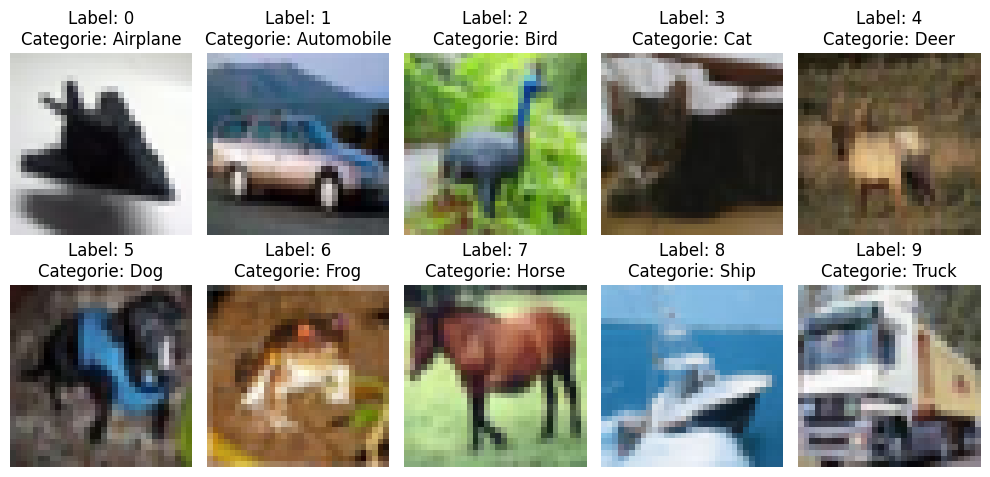

In [6]:
plt.figure(figsize=(10, 5))


for label, category in label_to_category.items(): ## Parcours de chaque étiquette et affichage d'une image

## Recherche de l'index de la première occurrence de l'étiquette dans les données d'entraînement
    index = (y_train == label).nonzero()[0][0]

    
    plt.subplot(2, 5, label + 1)
    plt.imshow(X_train[index])
    plt.title(f"Label: {label}\nCategorie: {category}")
    plt.axis('off')

plt.tight_layout() ## Ajustement de la mise en page et affichage de la figure


plt.show()

# *`One-hot encoding`* 

<div style="background-color: #f4f4f4; padding: 20px; border-radius: 10px;">
    <p>Les étiquettes dans les ensembles d'entraînement et de test, <strong>y_train</strong> et <strong>y_test</strong>, sont converties en <strong>variables catégorielles</strong> à l'aide de la fonction <strong>to_categorical</strong>. Cette transformation est réalisée pour s'assurer que les étiquettes sont représentées de manière appropriée pour une tâche de classification.</p>
    <p>Les variables catégorielles sont une forme de <strong>représentation one-hot</strong>, où chaque étiquette est encodée sous forme d'un vecteur binaire avec une seule composante active. Par exemple, si une étiquette avait la valeur 3 dans l'ensemble original, après conversion en variable catégorielle, elle serait représentée par le vecteur [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], où la quatrième composante est activée pour indiquer la classe correspondante.</p>
    <p>Cette conversion est couramment utilisée dans les problèmes de <strong>classification multiclasse</strong> où il y a plus de deux classes possibles. Elle permet de faciliter l'apprentissage des modèles de machine learning et d'améliorer les performances de prédiction en assurant une représentation appropriée des étiquettes.</p>
</div>


In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Xception Model : 

## Modèle Xception

Xception est un modèle de réseau de neurones convolutionnel (CNN) profond introduit par François Chollet, le créateur de Keras, en 2017. Ce modèle repose sur le concept de "Convolution à Séparation en Profondeur", une variation des convolutions traditionnelles qui vise à améliorer l'efficacité computationnelle et la capacité de représentation des réseaux neuronaux.

### Points clés :

1. **`Architecture inspirée d'Inception`** : Xception est basé sur l'architecture Inception, célèbre pour son utilisation de différentes tailles de noyaux de convolution dans une même couche pour capturer des motifs à différentes échelles spatiales.



2. **`Convolution à Séparation en Profondeur`** : Contrairement à Inception qui utilise des convolutions classiques, Xception utilise des convolutions "Convolution à Séparation en Profondeur". Cette opération divise une convolution standard en deux étapes distinctes :
   - Convolution spatiale (appelée "convolution en profondeur") qui traite chaque canal d'entrée séparément.
   - Convolution en profondeur (appelée "convolution à point") qui combine les informations spatiales de chaque canal d'entrée.
   
   

3. **`Réduction du nombre de paramètres`** : En utilisant les convolutions "Convolution à Séparation en Profondeur", Xception réduit considérablement le nombre de paramètres par rapport aux réseaux classiques, tout en conservant une capacité de représentation élevée.



4. **`Performances`** : Xception a démontré des performances impressionnantes sur diverses tâches de vision par ordinateur, notamment la classification d'images, la détection d'objets et la segmentation sémantique.


# Xception Architecture : 

# Modèle Xception : Architecture et Fonctionnement

Le modèle Xception est une architecture de réseau de neurones convolutifs (CNN) qui s'appuie sur des convolutions séparables en profondeur. Voici une description détaillée :

## 1. Structure du réseau Xception

- Le réseau Xception est basé sur l'utilisation de convolutions séparables en profondeur pour améliorer l'efficacité du modèle.
- La structure du réseau Xception se compose de trois parties principales :
  - **Flux d'entrée (Entry Flow)** : Prétraite les informations initiales.
  - **Flux intermédiaire (Middle Flow)** : Répété huit fois, contenant des blocs de convolutions.
  - **Flux de sortie (Exit Flow)** : Traite les données en sortie.
- Toutes les couches de convolution et de convolution séparable sont suivies d'une normalisation par lots (batch normalization).
- Xception a surpassé VGG-16, ResNet et Inception V3 dans la plupart des défis de classification classiques.

## 2. Fonctionnement de Xception

- Xception repose principalement sur deux points :
  - **Convolution séparable en profondeur** :
    - Une alternative aux convolutions classiques, beaucoup plus efficace en termes de temps de calcul.
    - Comprend deux étapes : convolution en profondeur et convolution ponctuelle, permettant de réduire considérablement le nombre d'opérations.

## 3. Avantages de la convolution séparable en profondeur

- Les convolutions séparables en profondeur permettent d'économiser des ressources de calcul tout en maintenant des performances de modèle comparables.
- Elles réduisent le coût des opérations de convolution tout en préservant la capacité du modèle à extraire des caractéristiques importantes.

En résumé, Xception est une architecture efficace qui combine la convolution séparable en profondeur avec des raccourcis entre les blocs de convolution, inspirés de ResNet.

[Source](https://maelfabien.github.io/deeplearning/xception/)


![ ](https://www.researchgate.net/publication/351371226/figure/fig2/AS:11431281263342263@1721988503496/Architecture-of-the-Xception-deep-CNN-model.png)


# Pretraitement des données : 

## Pourquoi on a grandit les images : 
Dans le cas de Xception, la taille d'entrée minimale recommandée est de 71x71 pixels, avec trois canaux de couleur (Rouge, Vert, Bleu, ou RGB).


- Xception et d'autres modèles CNN ont été conçus avec des couches de convolution, de pooling et d'autres opérations qui ont des contraintes de taille d'entrée.


- Les premières couches d'un modèle CNN sont responsables de l'extraction des caractéristiques de l'image. Si l'image est trop petite, certaines caractéristiques importantes peuvent être perdues ou mal interprétées, ce qui peut entraîner une dégradation des performances du modèle.

- C'est pourquoi il est généralement recommandé de redimensionner les images d'entrée à une taille minimale de 71x71 pixels (ou plus) avec trois canaux de couleur (RGB) lors de l'entraînement du modèle Xception 

In [10]:
resized_images = []

for image in X_train : 
    img = Image.fromarray( image ) 
    resized_image = img.resize((71, 71))
    resized_images.append(np.array(resized_image))
    
X_train_resized = np.array(resized_images)


In [11]:
resized_images_test = []

for image in X_test : 
    img = Image.fromarray( image ) 
    resized_image = img.resize((71, 71))
    resized_images_test.append(np.array(resized_image))
    
X_test_resized = np.array(resized_images_test)

# Normalisation

In [12]:
X_train = X_train_resized.astype('float32') / 255.0
X_test =  X_test_resized.astype('float32') / 255.0

### Fine tuning : 

`Definition : `  le "fine-tuning" est une technique où l'on ajuste les poids d'un modèle pré-entraîné pour résoudre une tâche spécifique. Plutôt que de former un modèle à partir de zéro, on commence avec un modèle déjà entraîné sur une tâche similaire ou sur un ensemble de données volumineux, puis on ajuste ses paramètres pour qu'il soit adapté à la tâche souhaitée.

Le processus de fine-tuning implique généralement de geler certains des premiers couches du modèle (qui contiennent généralement des caractéristiques générales apprises lors de l'entraînement initial) pour éviter de perdre les informations précédemment apprises, puis de ré-entraîner les couches supérieures (ou toutes les couches) avec les nouvelles données spécifiques à la tâche. Cela permet au modèle de s'adapter à la tâche cible tout en préservant les connaissances préalablement acquises.

## Processus de fine-tuning en transfert Learning : 


En transfert d'apprentissage, le fine-tuning est une technique essentielle pour adapter un modèle pré-entraîné à une tâche spécifique. Voici les étapes typiques du processus de fine-tuning :

1. ** `Choisir un modèle pré-entraîné`**: Sélectionnez un modèle qui a été pré-entraîné sur un ensemble de données volumineux et qui a démontré des performances élevées sur une tâche similaire à celle que vous souhaitez résoudre. Dans notre cas c'est le <strong> `Xception` </strong> 



2. **`Initialiser le modèle`**: Chargez le modèle pré-entraîné et figez ses premières couches pour empêcher qu'elles ne soient modifiées. Ces premières couches contiennent généralement des caractéristiques générales et abstraites qui sont utiles pour de nombreuses tâches.



3. **`Configurer les couches supérieures`**: Définissez les couches supérieures du modèle pour qu'elles correspondent à la tâche spécifique que vous souhaitez résoudre. Cela peut impliquer d'ajouter de nouvelles couches entièrement connectées, de modifier les couches existantes ou de remplacer complètement les couches supérieures.



4. **`Ré-entraîner le modèle`**: Entraînez le modèle avec vos propres données spécifiques à la tâche. Vous pouvez ajuster les poids de toutes les couches (ou seulement celles que vous avez configurées), en utilisant une technique d'optimisation comme la descente de gradient stochastique (SGD) avec un faible taux d'apprentissage.



5. **`Évaluer les performances`**: Une fois que le fine-tuning est terminé, évaluez les performances du modèle sur un ensemble de données de validation ou de test pour déterminer son efficacité dans la résolution de la tâche souhaitée.



## Description du code : Construction du modèle CNN avec Keras Tuner

Ce code définit une fonction `build_model` qui crée un modèle convolutionnel (CNN) en utilisant Keras Tuner pour l'optimisation des hyperparamètres. Voici une explication détaillée du fonctionnement de cette fonction :

- **`base_model`**: Utilisation du modèle Xception pré-entraîné sur l'ensemble de données ImageNet en tant que base. Les poids pré-entraînés sont gelés en définissant `trainable=False`, ce qui signifie que ces couches ne seront pas mises à jour pendant l'entraînement.

- **`inputs`**: Définition de la couche d'entrée du modèle avec une taille d'image de 71x71 pixels et trois canaux de couleur (RGB).

- **`GlobalAveragePooling2D`**: Réduction des dimensions de l'entrée à une dimension unique en prenant la moyenne des valeurs de chaque canal après les opérations de convolution.

- **`Dense`**: Ajout d'une couche entièrement connectée avec un nombre variable d'unités (hyperparamètre `units`), activée par la fonction ReLU.

- **`outputs`**: Couche de sortie avec 10 unités activées par la fonction softmax pour effectuer une classification multiclasse (assumant 10 classes dans cet exemple).

- **Compilation du modèle**: Utilisation de l'optimiseur sélectionné parmi les options 'adam', 'sgd' et 'rmsprop' (hyperparamètre `optimizer`). La fonction de perte est définie comme la perte d'entropie croisée catégorielle, et la métrique est l'exactitude (accuracy).

Une fois que le modèle est construit, il est renvoyé pour être utilisé dans le processus d'optimisation des hyperparamètres avec Keras Tuner.

Ce code permet de créer un modèle CNN flexible avec des hyperparamètres optimisables pour des tâches de classification d'images.


In [13]:
def build_model(hp):
    base_model = Xception(weights='imagenet', include_top=False, input_shape=(71, 71, 3))
    base_model.trainable = False  # Gel des couches pré-entraînées

    inputs = Input(shape=(71, 71, 3))
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    
    model = Model(inputs, outputs)
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop']),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [69]:
# from keras_tuner
# .tuners import RandomSearch
# from tensorflow.keras.applications import Xception

##  Random Search avec Keras Tuner

Ce code utilise Keras Tuner pour effectuer une recherche aléatoire d'hyperparamètres afin d'optimiser un modèle CNN pour la classification d'images sur l'ensemble de données CIFAR-10. Voici une explication détaillée du fonctionnement de ce code :

- **`start_time`**: Enregistre le temps de début de l'opération de recherche aléatoire d'hyperparamètres.

- **`tuner`**: Initialise un objet de recherche aléatoire (`RandomSearch`) en spécifiant la fonction de création de modèle (`build_model`) à optimiser, l'objectif de l'optimisation (ici, la précision sur l'ensemble de validation `'val_accuracy'`), le nombre maximal de tentatives (`max_trials`), le nombre d'exécutions par tentative (`executions_per_trial`), le répertoire de sauvegarde pour les résultats (`directory`), et le nom du projet (`project_name`).

- **`end_time`**: Enregistre le temps de fin de l'opération de recherche aléatoire d'hyperparamètres.

- **`training_time`**: Calcule la durée totale de l'opération de recherche aléatoire d'hyperparamètres en soustrayant le temps de début du temps de fin.

- **`print()`**: Affiche le temps total de l'opération de recherche aléatoire d'hyperparamètres.

Ce code permet de lancer une recherche aléatoire d'hyperparamètres pour optimiser un modèle CNN sur l'ensemble de données CIFAR-10. La durée totale de cette opération est également affichée à des fins de suivi.


In [14]:
start_time = time.time()
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='cifar10_xception',
)
end_time = time.time()
training_time = end_time-start_time
print("Random search time:", training_time)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Random search time: 2.6666922569274902


## Recherche des hyperparamètres avec Keras Tuner

Ce code utilise Keras Tuner pour rechercher les meilleurs hyperparamètres pour le modèle CNN construit précédemment. Voici une explication détaillée :

- **`start_time`**: Enregistrement du temps de début de la recherche d'hyperparamètres à l'aide de la fonction `time.time()`.

- **`tuner.search(X_train, y_train, epochs=10, validation_data=(X_test,y_test))`**: Lancement de la recherche d'hyperparamètres à l'aide de la méthode `search` du tuner. Cette méthode prend les données d'entraînement (`X_train`, `y_train`) et les données de validation (`X_test`, `y_test`) pour évaluer les performances du modèle à chaque combinaison d'hyperparamètres. L'argument `epochs=10` spécifie le nombre d'époques d'entraînement pour chaque essai d'hyperparamètres.

- **`end_time`**: Enregistrement du temps de fin de la recherche d'hyperparamètres à l'aide de la fonction `time.time()`.

- **`search_time`**: Calcul de la durée totale de la recherche d'hyperparamètres en soustrayant le temps de fin (`end_time`) du temps de début (`start_time`).

- **`print("Random search time:", search_time)`**: Affichage du temps total de recherche d'hyperparamètres.

Cette partie du code permet de lancer la recherche d'hyperparamètres avec Keras Tuner pendant un certain nombre d'époques spécifié, puis de calculer et d'afficher le temps total de recherche. Une fois que la recherche est terminée, le modèle avec les meilleurs hyperparamètres trouvés peut être utilisé pour l'entraînement final sur l'ensemble des données d'entraînement.


In [15]:
start_time = time.time()
tuner.search(X_train, y_train, epochs=15, validation_data=(X_test,y_test))
end_time = time.time()
search_time = end_time - start_time
print("Random search time:", search_time)

Trial 10 Complete [00h 06m 46s]
val_accuracy: 0.7286999821662903

Best val_accuracy So Far: 0.7402999997138977
Total elapsed time: 01h 09m 02s
Random search time: 4142.475505113602


In [16]:
print("Random search time:", search_time/60 ,' minutes ')

Random search time: 69.04125841856003  minutes 


In [17]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [18]:
print("Best Hyperparameters:")
print(f"Units: {best_hps.get('units')}")
print(f"Optimizer: {best_hps.get('optimizer')}")

Best Hyperparameters:
Units: 256
Optimizer: sgd


In [19]:
start_time = time.time()
model = tuner.hypermodel.build(best_hps)
history00  = model.fit(X_train, y_train, epochs=30, validation_split=0.15)
end_time = time.time()
training_time = end_time-start_time
print("Training time:", training_time)

Epoch 1/30
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.5706 - loss: 1.3226 - val_accuracy: 0.6964 - val_loss: 0.9213
Epoch 2/30
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.7119 - loss: 0.8803 - val_accuracy: 0.7035 - val_loss: 0.9060
Epoch 3/30
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.7423 - loss: 0.7946 - val_accuracy: 0.7213 - val_loss: 0.8455
Epoch 4/30
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.7581 - loss: 0.7401 - val_accuracy: 0.7040 - val_loss: 0.8969
Epoch 5/30
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.7675 - loss: 0.7051 - val_accuracy: 0.7136 - val_loss: 0.8613
Epoch 6/30
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.7797 - loss: 0.6663 - val_accuracy: 0.7207 - val_loss: 0.8383
Epoch 7/30
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.7853 - loss: 0.6402 - val_accuracy: 0.7391 - val_loss: 0.7956
Epoch 8/30
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.8009 -

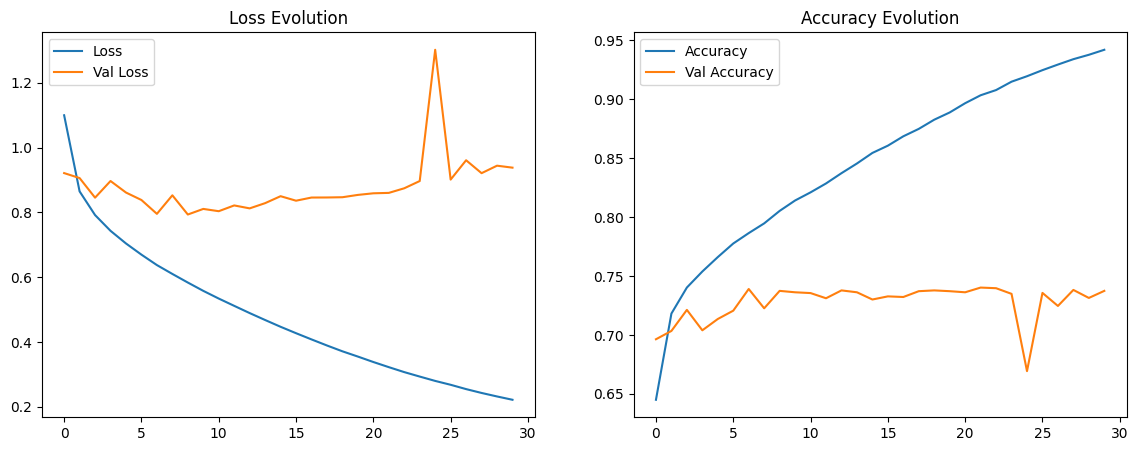

In [20]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history00.history['loss'], label='Loss')
plt.plot(history00.history['val_loss'], label='Val Loss')
plt.title('Loss Evolution')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history00.history['accuracy'], label='Accuracy')
plt.plot(history00.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Evolution')
plt.legend()
plt.show()

## Précision Top-1 et Top-5 

- **Précision Top-1** : La précision top-1 représente le pourcentage d'images pour lesquelles le modèle a correctement prédit la classe correcte comme la première prédiction. En d'autres termes, sur un ensemble d'images donné, la précision top-1 mesure la proportion d'images pour lesquelles le modèle a fait la bonne prédiction en tant que première prédiction. Par exemple, si vous avez 100 images et que le modèle a correctement prédit la classe correcte pour 70 d'entre elles en tant que première prédiction, alors la précision top-1 est de 70%.

- **Précision Top-5** : La précision top-5 représente le pourcentage d'images pour lesquelles la classe correcte est parmi les cinq premières prédictions du modèle. Cela signifie que pour chaque image, le modèle génère cinq prédictions, et si la classe correcte est parmi ces cinq prédictions, alors cette prédiction est considérée comme correcte pour la précision top-5. Par exemple, si pour une image donnée, la classe correcte est l'une des cinq classes les plus probables prédites par le modèle, alors cette prédiction est considérée comme correcte pour la précision top-5.

Ces métriques sont largement utilisées pour évaluer les performances des modèles de classification d'images. La précision top-1 mesure la capacité du modèle à faire la bonne prédiction en tant que première prédiction, tandis que la précision top-5 mesure sa capacité à identifier la classe correcte même si elle n'est pas la prédiction la plus probable. Cela permet d'avoir une évaluation plus nuancée des performances du modèle, en tenant compte de différentes situations de prédiction.


In [21]:
y_pred = model.predict(X_test)

# Calculer la précision top-1
top1_accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1))

# Trier les prédictions pour chaque échantillon et obtenir les cinq classes les plus probables
top5_predictions = np.argsort(y_pred, axis=1)[:, -5:]

# Vérifier si la vraie classe est parmi les cinq premières prédictions pour chaque échantillon
top5_accuracy = np.mean([1 if np.argmax(y_test[i]) in top5_predictions[i] else 0 for i in range(len(y_test))])

print(f"Précision Top-1 : {top1_accuracy}")
print(f"Précision Top-5 : {top5_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step
Précision Top-1 : 0.7335
Précision Top-5 : 0.9767


## objectif non attient pour la top-1 accurcy : 
Pour le top-1 accuracy achever par le model Xeption est : 79% pourtant que notre est : `73%` , c'est a dire q'on la pas encore depasser , Cependant, notre modèle actuel n'a pas encore atteint ce niveau de performance, ce qui signifie que nous n'avons pas encore dépassé ce seuil. Dans ce cas, il serait judicieux d'envisager l'utilisation de techniques d'augmentation de données pour améliorer les performances de notre modèle.pourra opter pour une data augmentaton, regularisation ou dropout ...

## objectif attient pour Top-5 : accuracy 
Pour le top-5 accuracy achever doner par le model Xeption est : 92% pourtant que notre est 97 % : c'est a dire que on battu ce score  deja depasser !! 

# Sauvgardons notre modele : 

In [24]:
model.save('/kaggle/working/my_model00.h5')

# Approche 2 : data augmentation

## Augmentation des données d'images avec ImageDataGenerator

Ce code utilise la classe `ImageDataGenerator` de TensorFlow Keras pour augmenter les données d'images. Voici une explication détaillée des paramètres de l'augmenteur :

- **`rotation_range=20`**: Rotation aléatoire des images dans la plage de -20 degrés à +20 degrés.

- **`zoom_range=0.15`**: Zoom aléatoire des images jusqu'à 15%.

- **`width_shift_range=0.2`**: Déplacement horizontal aléatoire des images jusqu'à 20% de leur largeur.

- **`height_shift_range=0.2`**: Déplacement vertical aléatoire des images jusqu'à 20% de leur hauteur.

- **`shear_range=0.15`**: Déformation cisaillée aléatoire des images jusqu'à 15%.

- **`horizontal_flip=True`**: Retournement horizontal aléatoire des images.

- **`fill_mode="nearest"`**: Mode de remplissage utilisé pour combler les pixels nouvellement créés, qui est "nearest" (remplissage avec la valeur du pixel le plus proche).

Ces transformations sont appliquées de manière aléatoire à chaque image d'entraînement pendant l'apprentissage, ce qui augmente la diversité des données et aide à améliorer la robustesse et la généralisation du modèle. L'augmentation des données est une technique efficace pour lutter contre le surajustement et améliorer les performances du modèle, en particulier lorsqu'il y a un nombre limité de données d'entraînement disponibles.


In [93]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmenter = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)


In [94]:
start_time = time.time()
model = tuner.hypermodel.build(best_hps)
# history  = model.fit(X_train, y_train, epochs=30, validation_split=0.15)
history = model.fit(augmenter.flow(X_train, y_train, batch_size=32),
          validation_data=(X_test, y_test),
#           steps_per_epoch=len(x_train) // 32,
          epochs=30)

end_time = time.time()
training_time = end_time-start_time
print("Training time:", training_time)

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 103s 62ms/step - accuracy: 0.5150 - loss: 1.4406 - val_accuracy: 0.6734 - val_loss: 1.0102
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - accuracy: 0.6373 - loss: 1.0736 - val_accuracy: 0.6974 - val_loss: 0.9295
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - accuracy: 0.6653 - loss: 0.9853 - val_accuracy: 0.7077 - val_loss: 0.8777
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - accuracy: 0.6739 - loss: 0.9519 - val_accuracy: 0.7132 - val_loss: 0.8630
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 56ms/step - accuracy: 0.6812 - loss: 0.9295 - val_accuracy: 0.7183 - val_loss: 0.8386
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - accuracy: 0.6858 - loss: 0.9175 - val_accuracy: 0.7159 - val_loss: 0.8359
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - accuracy: 0.6878 - loss: 0.9036 - val_accuracy: 0.7156 - val_loss: 0.8321
Epoch 9/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 56ms/step - accuracy: 0.6941 - loss: 0.8

In [95]:
# history

In [25]:
# plt.figure(figsize=(14, 5))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['loss'], label='Loss')
# plt.plot(history.history['val_loss'], label='Val Loss')
# plt.title('Loss Evolution')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(history.history['accuracy'], label='Accuracy')
# plt.plot(history.history['val_accuracy'], label='Val Accuracy')
# plt.title('Accuracy Evolution')
# plt.legend()
# plt.show()


In [96]:
y_pred = model.predict(X_test)

# Calculer la précision top-1
top1_accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1))

# Trier les prédictions pour chaque échantillon et obtenir les cinq classes les plus probables
top5_predictions = np.argsort(y_pred, axis=1)[:, -5:]

# Vérifier si la vraie classe est parmi les cinq premières prédictions pour chaque échantillon
top5_accuracy = np.mean([1 if np.argmax(y_test[i]) in top5_predictions[i] else 0 for i in range(len(y_test))])

print(f"Précision Top-1 : {top1_accuracy}")
print(f"Précision Top-5 : {top5_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step
Précision Top-1 : 0.7453
Précision Top-5 : 0.9826


In [ ]:
model.save('/kaggle/working/my_model01.h5')

# Conclusion: 

On peut bien visulaizer d'apres les resultats des deux approches utilisee, que la deuxieme donne des meilleurs resultats pou la top-1 accuracy meme si on est a 5% pour battre le score qui est de 79%. aussi la deuxieme approche donner des meiileurs resultats pour la Top-5 accuracy  